# Klasse A versterkers

## Indeling vermogenversterkers

In {numref}`vermogenversterkers` geven we een overzicht van de verschillende versterkers die we zullen bespreken in de leerlijn analoge elektronica. In dit hoofdstuk behandelen we de klasse A versterkers. Zoals je in de tabel kan zien, zijn dit versterkers die aan een lage frequentie werken en ook niet een resonant kring hebben zijn. Bovendien is er slechts 1 transistor die het vermogen van de finale trap gaat leveren. Natuurlijk zijn er normaal heel wat andere transistors aanwezig in het schema maar die werken op een veel lager vermogen, dit is een veel lagere stroom en in vele gevallen ook een veel lagere spanning.

:::{list-table} Indeling van de vermogenversterkers
:header-rows: 1
:name: vermogenversterkers

* - 
  - laagfrequent of breedband
  - hoogfrequent of resonant
* - 1 transistor in de vermogentrap
  - **Klasse A**
  - Klasse C <BR> Klasse F <BR>Klasse E
* - 2 of meer  transistors in de vermogentrap
  - Klasse B  <BR> Klasse G
  - Klasse D
:::

In [1]:
from cursusdef import *

### Basisschema

Het basisschema van de klasse A versterker vinden we terug in {numref}`Afig1`. Om hiervan een Spice simulatie te maken, nummeren we de verschillende knopen in dit netwerk zoals je kan zien in {numref}`Afig1_2`.

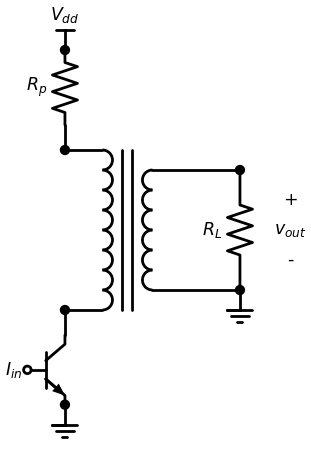

In [2]:
with schemdraw.Drawing():
    T = BjtNpn(lftlabel='Iin')
    Ground(xy=T.emitter)
    Dot()
    Dot(open=True,xy=T.base)
    Line(xy=T.collector, d='up', l=0.5)
    Dot()
    Line( d='right', l=0.75)
    trans = Transformer(t1=8, t2=6, d='right')
    Line(xy=trans.p1, d='left', l=0.75)
    Dot()
    Line( d='up', l=0.5)
    Rp = Resistor( d='up', label='Rp',l=1.5)
    Vdd(label='Vdd')
    Dot()
    s1=Line(xy=trans.s1, d='right', l=1.75)
    Line(xy=trans.s2, d='right', l=1.75)
    Dot()
    Ground()
    RL = Resistor(d='up', toy=s1.end,label='RL')
    Dot()
    Gap(d='up', xy= RL.start, toy= RL.end, label=['-','vout','+'],lblofst=-1)

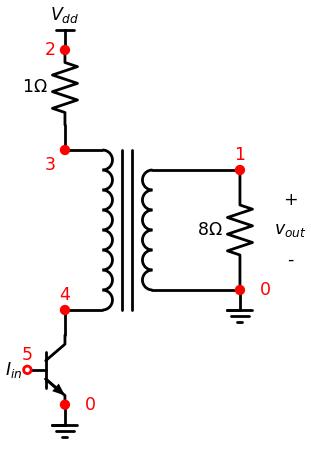

In [18]:
with schemdraw.Drawing():
    T = BjtNpn(lftlabel='$I_{in}$')
    Ground(xy=T.emitter)
    Dot(color='red').label('0',  loc='center', ofst=[.5,0])
    Dot(open=True,xy=T.base, color='red').label('5',  loc='center', ofst=[0,.3]) 
    Line(xy=T.collector, d='up', l=0.5)
    Dot(color='red').label('4',  loc='center', ofst=[0,.3]) 
    Line( d='right', l=0.75)
    trans = Transformer(t1=8, t2=6, d='right')
    Line(xy=trans.p1, d='left', l=0.75)
    Dot(color='red').label('3',  loc='center', ofst=[-0.3,-0.3]) 
    Line( d='up', l=0.5)
    Rp = Resistor( d='up', label='$1 \Omega$',l=1.5)
    Vdd(label='$V_{dd}$')
    Dot(color='red').label('2',  loc='center', ofst=[-.3,0]) 
    s1=Line(xy=trans.s1, d='right', l=1.75)
    Line(xy=trans.s2, d='right', l=1.75)
    Dot(color='red').label('0',  loc='center', ofst=[.5,0]) 
    Ground()
    RL = Resistor(d='up', toy=s1.end,label='$8 \Omega$')
    Dot(color='red').label('1',  loc='center', ofst=[0,.3]) 
    Gap(d='up', xy= RL.start, toy= RL.end, label=['-','$v_{out}$','$+$'],lblofst=-1)

### Overeenkomende Spice listing

De overeenkomende spice listing wordt dan:

```{literalinclude} ./simul/klasseA.sp
:language: spice
:name: listingA1
:caption: basis Klasse A circuit
```

In [2]:
spicelisting("simul/klasseA.sp")

* Spice file van een eenvoudige Klasse A versterker
R_R6         0 1  8
R_R7         3 2  1
L1_TX1       3 4 25m
L2_TX1       1 0 1m
K_TX1        L1_TX1 L2_TX1 1.
Q_Q5         4 5 0 Q2
I_I4         0 5  SIN(17m 15m 10k) DC=17m
V_VDD        2 0 66V

.model Q2  NPN(Is=14.34p BF=20 )

Vergelijk deze Spice list aandachtig met {numref}`Afig1_2`. Voor elk element, met uitzondering van de transformator, vinden we de 2 of 3 knopen terug die ook in het schema staan. De uitgang wordt belast met een weerstand van 8 $\Omega$. De weerstand van de primaire wikkeling van de transformator is natuurlijk ongewenst maar we kunnen deze niet zomaar verwaarlozen. We moeten dit correct inbrengen om een realistische simulatie te bekomen. We doen dit door een weerstand van 1 $\Omega$ te plaatsen tussen knopen 2 en 3. Voor de vermogentransistor (Q5) nemen we in deze simulatie een bipolaire transistor. In het model van deze transistor (de naam van het model is Q2) zien we dat deze transistor een voorwaartse stroomversterking ($\beta_F$) heeft van 20.

De transformator TX1 implementeren we in spice aan de hand van de 2 spoelen L1_TX1 en L2_TX1 die gekoppeld worden door de koppeling K_TX1. De koppelingsfactor is 1. Uit de ratio van de 2 spoelwaardes ($\frac{25 mH}{1 mH}$ =25) kunnen we ook de wikkelverhouding (N) afleiden: $ 5 = \sqrt{25}$.

De bovenstaande netwerkcode simuleren we in Spice. {numref}`afigstroomvsspanning`  toont zowel de stromen (rechts) als de spanningen (links) als functie van de tijd.

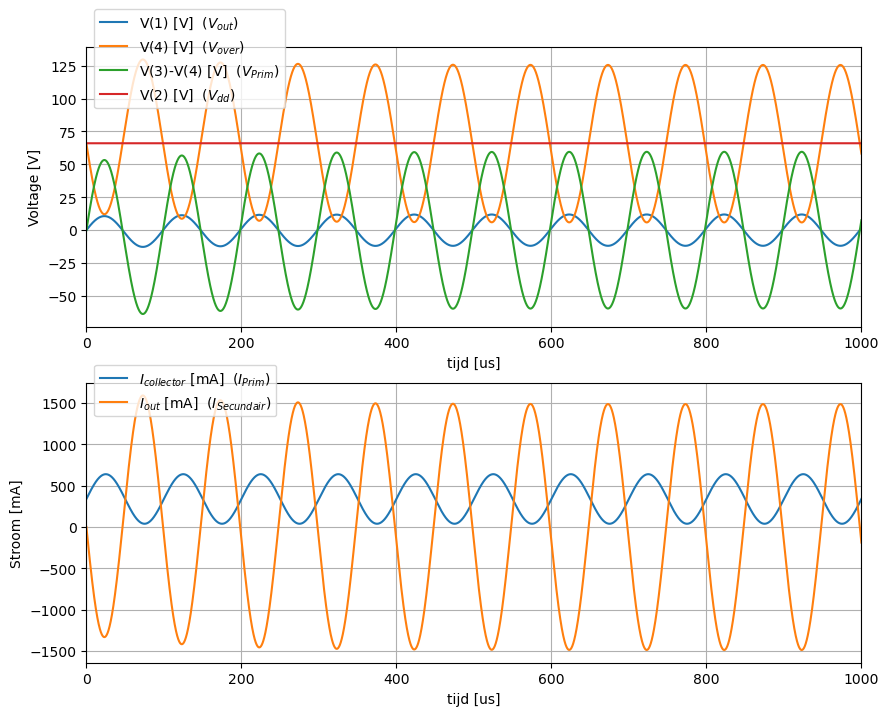

In [3]:
circuit=SpiceParser(path='simul/klasseA.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(2,1,figsize=(10, 8))
ax[0].plot(analysis.time*1e6,analysis.nodes['1'],label='V(1) [V]  ($V_{out}$)')
ax[0].plot(analysis.time*1e6,analysis.nodes['4'],label='V(4) [V]  ($V_{over}$)' )
ax[0].plot(analysis.time*1e6,analysis.nodes['3']-analysis.nodes['4'],label='V(3)-V(4) [V]  ($V_{Prim}$)' )
ax[0].plot(analysis.time*1e6,analysis.nodes['2'],label='V(2) [V]  ($V_{dd}$)' )
ax[0].legend( loc=(0.01,.78))
ax[0].grid()
ax[0].set_xlabel('tijd [us]')
ax[0].set_xlim(0,end_time*1e6)
ax[0].set_ylabel('Voltage [V]')

ax[1].plot(analysis.time*1e6,analysis.branches['l1_tx1']*1e3,label='$I_{collector}$ [mA]  ($I_{Prim}$)')
ax[1].plot(analysis.time*1e6,analysis.branches['l2_tx1']*1e3,label='$I_{out}$ [mA]  ($I_{Secundair}$)')
ax[1].legend( loc=(0.01,.88))
ax[1].grid()
ax[1].set_xlabel('tijd [us]')
ax[1].set_xlim(0,end_time*1e6)
ax[1].set_ylabel('Stroom [mA]')
plt.show()

Het is ook altijd interessant om van dezelfde simulatie de stroom door de transistor versus de spanning over de transistor te plotten. Dit zien we in {numref}`afigstroomvsspanning2`.

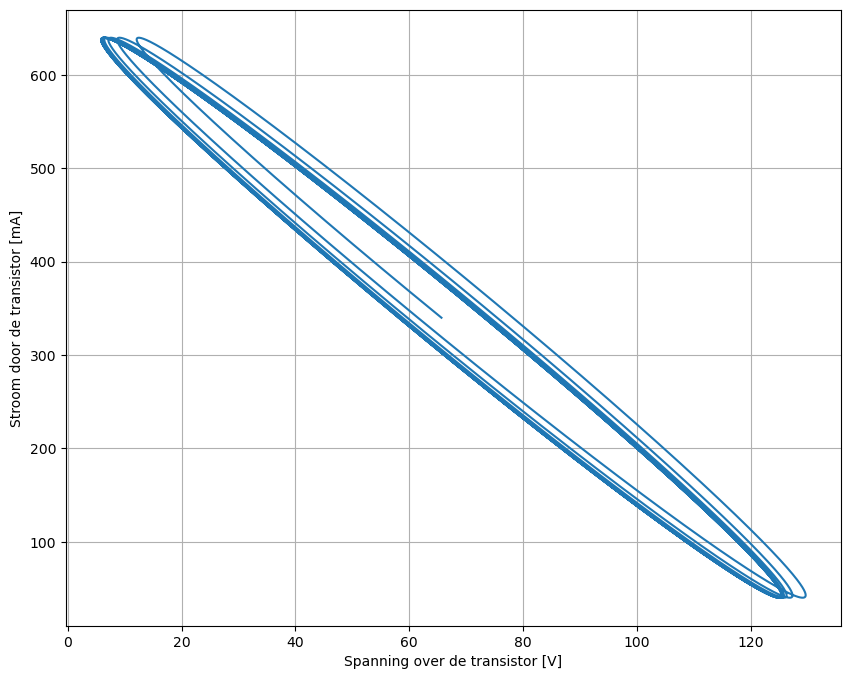

In [5]:
figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['4'],analysis.branches['l1_tx1']*1e3)
ax.grid()
ax.set_xlabel('Spanning over de transistor [V]')
ax.set_ylabel('Stroom door de transistor [mA]');

Wanneer we de spoelwaarde van de primaire en de secundaire wikkeling heel erg sterk verhogen (zonder de wikkelverhouding van 5 hierbij aan te passen), valt het faseverschil tussen de stroom en de spanning weg en krijgen we een plot waarbij we een mooi linair verband zien tussen stroom en spanning, zowel over de primaire (blauwe curve) als over de secundaire wikkeling (orange curve) (zie {numref}`Afig3`). De spice code voor deze simulatie met aangepaste wikkelverhouding kan je hieronder terugvinden.

```{literalinclude} ./simul/klasseA2.sp
:language: spice
:name: listingA2
:caption: basis Klasse A circuit
```

In [3]:
spicelisting("simul/klasseA2.sp")

* Spice file van een eenvoudige Klasse A versterker
R_R6         0 1  8
R_R7         3 2  1
L1_TX1       3 4 25
L2_TX1       1 0 1
K_TX1        L1_TX1 L2_TX1 1.
Q_Q5         4 5 0 Q2
I_I4         0 5  SIN(17m 15m 10k) DC=17m
V_VDD        2 0 66V

.model Q2  NPN(Is=14.34p BF=20 )

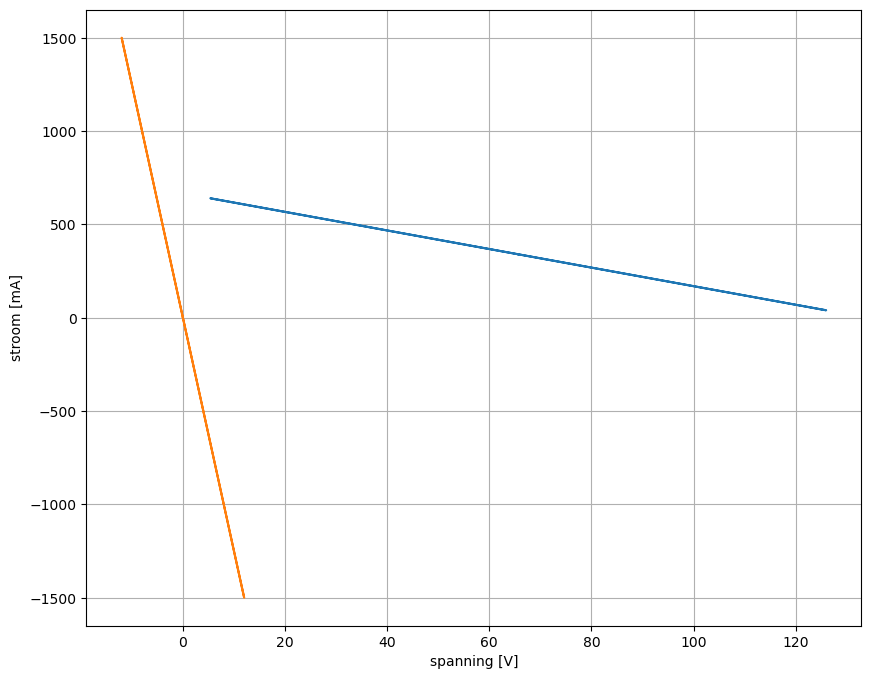

In [6]:
circuit=SpiceParser(path='simul/klasseA2.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['4'],analysis.branches['l1_tx1']*1e3)
ax.plot(analysis.nodes['1'],analysis.branches['l2_tx1']*1e3)
ax.grid()
ax.set_xlabel('spanning [V]')
ax.set_ylabel('stroom [mA]');

Het verschil in fase tussen de stroom door de transistor en de spanning over de transistor kunnen we ook verkleinen door de frequentie te verhogen. In de onderstaande spice listing is de frequentie van de stroombron I4 aan de basis van de bipolaire transistor verhoogt van 10 kHz naar 100 kHz. Uit de simulatie in {numref}`AfigHF` zien we dat ook hier weer een bijna linair verloop tussen stroom en spanning wodt bekomen.

```{literalinclude} ./simul/klasseA3.sp
:language: spice
:name: listingA3
:caption: basis Klasse A circuit
```

In [4]:
spicelisting("simul/klasseA3.sp")

* Spice file van een eenvoudige Klasse A versterker
R_R6         0 1  8
R_R7         3 2  1
L1_TX1       3 4 25m
L2_TX1       1 0 1m
K_TX1        L1_TX1 L2_TX1 1.
Q_Q5         4 5 0 Q2
I_I4         0 5  SIN(17m 15m 100k) DC=17m
V_VDD        2 0 66V

.model Q2  NPN(Is=14.34p BF=20 )

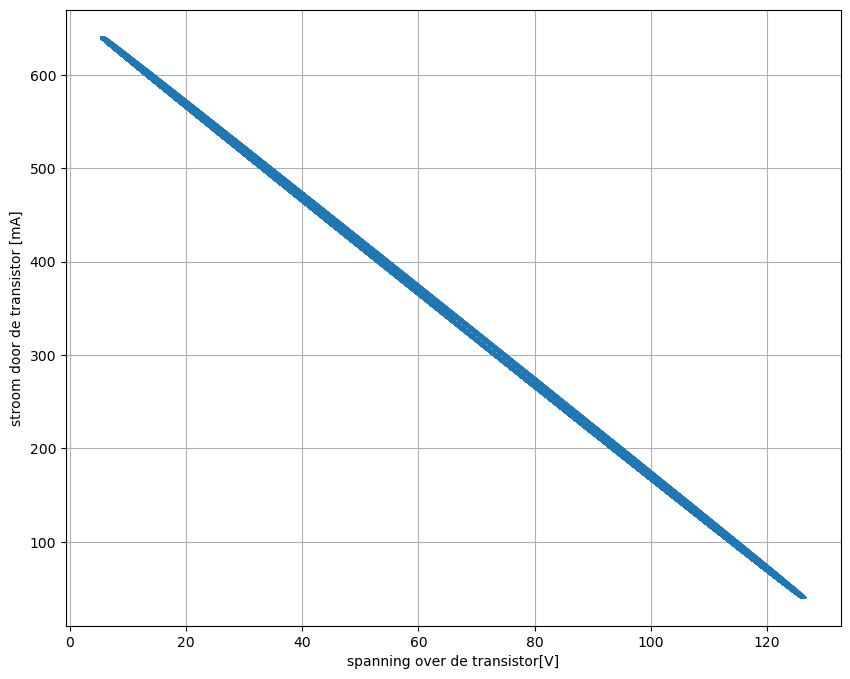

In [7]:
circuit=SpiceParser(path='simul/klasseA3.sp').build_circuit()  
end_time=1e-3
simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=100e-9, end_time=end_time)

figure, ax = plt.subplots(figsize=(10, 8))
ax.plot(analysis.nodes['4'],analysis.branches['l1_tx1']*1e3)
ax.grid()
ax.set_xlabel('spanning over de transistor[V]')
ax.set_ylabel('stroom door de transistor [mA]');

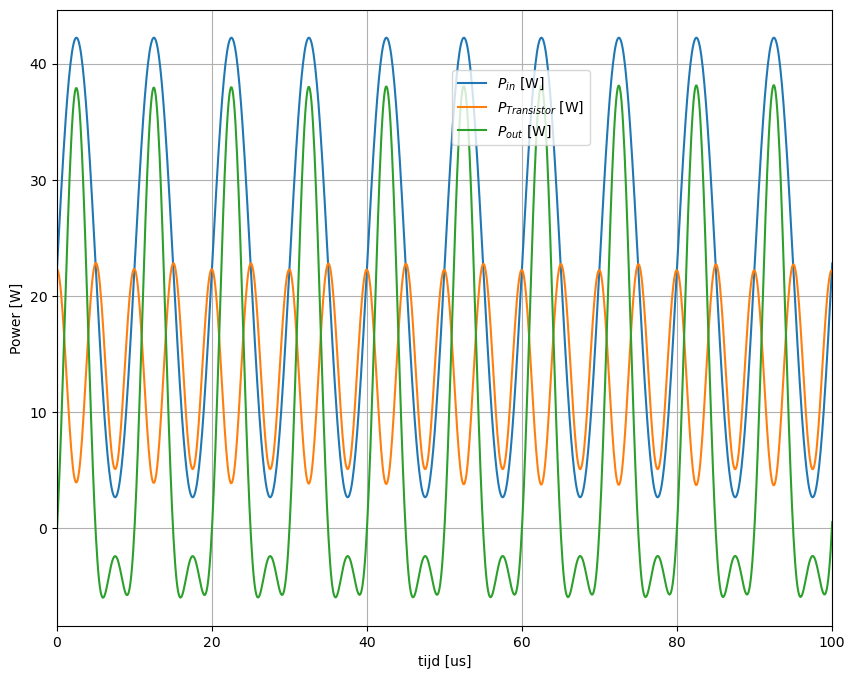

In [9]:
figure, ax = plt.subplots(1,1,figsize=(10, 8))
ax.plot(analysis.time*1e6,analysis.branches['l1_tx1']*66,label='$P_{in}$ [W]')
ax.plot(analysis.time*1e6,analysis.nodes['4']*analysis.branches['l1_tx1'],label='$P_{Transistor}$ [W]' )
ax.plot(analysis.time*1e6,(analysis.nodes['3']-analysis.nodes['4'])*analysis.branches['l1_tx1'],label='$P_{out}$ [W]' )
ax.legend( loc=(0.51,.78))
ax.grid()
ax.set_xlabel('tijd [us]')
ax.set_xlim(0,end_time*1e5)
ax.set_ylabel('Power [W]');

We kunnen de simulatie van het ogenblikkelijk vermogen in {numref}`afigvermogen` ook integreren over een aantal periodes. We bekomen dat het gemiddeld vermogen:

$$ P_{in} = \frac{1}{T}\int_{0}^{T}V_{over} I_{door} \partial t $$

In [23]:
from scipy.integrate import simpson
pin=simpson(analysis.branches['l1_tx1']*66,analysis.time)/1e-3
ptransistor= simpson(analysis.nodes['4']*analysis.branches['l1_tx1'],analysis.time)/1e-3
puit=simpson((analysis.nodes['3']-analysis.nodes['4'])*analysis.branches['l1_tx1'],analysis.time)/1e-3
print(r"Het gemiddelde inputvermogen gedurende de 10 eerste periodes is {:.2f} W".format(pin))
print(r"Het gemiddelde vermogenverlies in de transistor gedurende de 10 eerste periodes is {:.2f} W".format(ptransistor))
print(r"Het gemiddelde vermogen aan de uitgang gedurende de 10 eerste periodes is {:.2f} W".format(puit))
print()
print("De gemiddelde efficentie gedurende de 10 eerste periodes is {:.2f} %".format( puit/pin*100))

Het gemiddelde inputvermogen gedurende de 10 eerste periodes is 22.44 W
Het gemiddelde vermogenverlies in de transistor gedurende de 10 eerste periodes is 13.78 W
Het gemiddelde vermogen aan de uitgang gedurende de 10 eerste periodes is 8.50 W

De gemiddelde efficentie gedurende de 10 eerste periodes is 37.89 %
